import python liabries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


upload data
link where i obtain the data from data.gov https://catalog.data.gov/dataset/transportation-public-financial-statistics-tpfs

In [ ]:

from google.colab import files


uploaded = files.upload()


Saving Transportation_Public_Financial_Statistics__TPFS_.csv to Transportation_Public_Financial_Statistics__TPFS_.csv


show the dataset

In [ ]:
Transportation_Public_Financial_data = pd.read_csv("Transportation_Public_Financial_Statistics__TPFS_.csv", header=0, sep=",")
print(Transportation_Public_Financial_data)

     cash_flow own_supporting user_other      trust_fund exp_type gov_level  \
0      Revenue     Supporting      Other  Non-Trust Fund        -   Federal   
1      Revenue     Supporting      Other  Non-Trust Fund        -   Federal   
2      Revenue     Supporting      Other  Non-Trust Fund        -   Federal   
3      Revenue     Supporting      Other  Non-Trust Fund        -   Federal   
4      Revenue     Supporting      Other  Non-Trust Fund        -   Federal   
...        ...            ...        ...             ...      ...       ...   
2541   Revenue          Total      Total           Total        -     Total   
2542   Revenue          Total      Total           Total        -     Total   
2543   Revenue          Total      Total           Total        -     Total   
2544   Revenue          Total      Total           Total        -     Total   
2545   Revenue          Total      Total           Total        -     Total   

                                     desccription  

display first 5 rows

In [ ]:
#Display the first few rows of the dataset
df=Transportation_Public_Financial_data
df.head()

,cash_flow,own_supporting,user_other,trust_fund,exp_type,gov_level,desccription,year,value,mode,chained_value,estimate_actual,deflator,gov_level_sort_order,mode_sort_order,user_other_grp
0,Revenue,Supporting,Other,Non-Trust Fund,-,Federal,General funds used for OST nonmodal outlays,2010,190000000.0,General,2.116850e+08,Actual,89.756,0,6,Other
1,Revenue,Supporting,Other,Non-Trust Fund,-,Federal,General funds used for OST nonmodal outlays,2011,105000000.0,General,1.138940e+08,Actual,92.191,0,6,Other
2,Revenue,Supporting,Other,Non-Trust Fund,-,Federal,General funds used for OST nonmodal outlays,2012,99000000.0,General,1.065158e+08,Actual,92.944,0,6,Other
3,Revenue,Supporting,Other,Non-Trust Fund,-,Federal,General funds used for OST nonmodal outlays,2013,168000000.0,General,1.780529e+08,Actual,94.354,0,6,Other
4,Revenue,Supporting,Other,Non-Trust Fund,-,Federal,General funds used for OST nonmodal outlays,2014,158000000.0,General,1.642463e+08,Actual,96.197,0,6,Other


checking missing values

In [ ]:
# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cash_flow             2546 non-null   object 
 1   own_supporting        2546 non-null   object 
 2   user_other            2546 non-null   object 
 3   trust_fund            2546 non-null   object 
 4   exp_type              2546 non-null   object 
 5   gov_level             2546 non-null   object 
 6   desccription          2546 non-null   object 
 7   year                  2546 non-null   int64  
 8   value                 2546 non-null   float64
 9   mode                  2546 non-null   object 
 10  chained_value         2537 non-null   float64
 11  estimate_actual       2546 non-null   object 
 12  deflator              1805 non-null   float64
 13  gov_level_sort_order  2546 non-null   int64  
 14  mode_sort_order       2546 non-null   int64  
 15  user_other_grp       

cash_flow                 0
own_supporting            0
user_other                0
trust_fund                0
exp_type                  0
gov_level                 0
desccription              0
year                      0
value                     0
mode                      0
chained_value             9
estimate_actual           0
deflator                741
gov_level_sort_order      0
mode_sort_order           0
user_other_grp            0
dtype: int64

**1.Descriptive Statistics**

Calculate the total, average, median, and range of value for different categories (e.g., by year, gov_level, mode).


In [ ]:

# Define a function to calculate descriptive statistics
def descriptive_statistics(df):
    # Total
    total_value = df.groupby(['year', 'gov_level', 'mode'])['value'].sum().reset_index(name='total_value')

    # Average
    average_value = df.groupby(['year', 'gov_level', 'mode'])['value'].mean().reset_index(name='average_value')

    # Median
    median_value = df.groupby(['year', 'gov_level', 'mode'])['value'].median().reset_index(name='median_value')

    # Range
    range_value = df.groupby(['year', 'gov_level', 'mode'])['value'].agg(lambda x: x.max() - x.min()).reset_index(name='range_value')

    # Merging the results into a single DataFrame
    descriptive_stats = total_value.merge(average_value, on=['year', 'gov_level', 'mode'])
    descriptive_stats = descriptive_stats.merge(median_value, on=['year', 'gov_level', 'mode'])
    descriptive_stats = descriptive_stats.merge(range_value, on=['year', 'gov_level', 'mode'])

    return descriptive_stats

# Calculate descriptive statistics for the dataset
descriptive_stats = descriptive_statistics(df)
descriptive_stats.head()


,year,gov_level,mode,total_value,average_value,median_value,range_value
0,2010,Amtrak,Railroads,7.306510e+09,1.461302e+09,1.429300e+09,3.162024e+09
1,2010,Federal,Air,4.430040e+10,2.461133e+09,6.004974e+08,1.061295e+10
2,2010,Federal,General,7.460000e+08,1.065714e+08,9.700000e+07,1.900000e+08
3,2010,Federal,Highways,1.137670e+11,6.320387e+09,1.223600e+09,3.013756e+10
4,2010,Federal,Pipeline,3.220000e+08,5.366667e+07,2.400000e+07,1.520000e+08


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_value'].plot(kind='hist', bins=20, title='total_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['average_value'].plot(kind='hist', bins=20, title='average_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['median_value'].plot(kind='hist', bins=20, title='median_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gov_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='total_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total_value', y='average_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='average_value', y='median_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='median_value', y='range_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gov_level')):
  _plot_series(series, series_name, i)
  fig.legend(title='gov_level', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['average_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gov_level')):
  _plot_series(series, series_name, i)
  fig.legend(title='gov_level', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('average_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['average_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('mode')):
  _plot_series(series, series_name, i)
  fig.legend(title='mode', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('average_value')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['total_value'].plot(kind='line', figsize=(8, 4), title='total_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['average_value'].plot(kind='line', figsize=(8, 4), title='average_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['median_value'].plot(kind='line', figsize=(8, 4), title='median_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['mode'].value_counts()
    for x_label, grp in _df_18.groupby('gov_level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gov_level')
_ = plt.ylabel('mode')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['gov_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='gov_level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['gov_level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='total_value', y='gov_level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['mode'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='total_value', y='mode', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

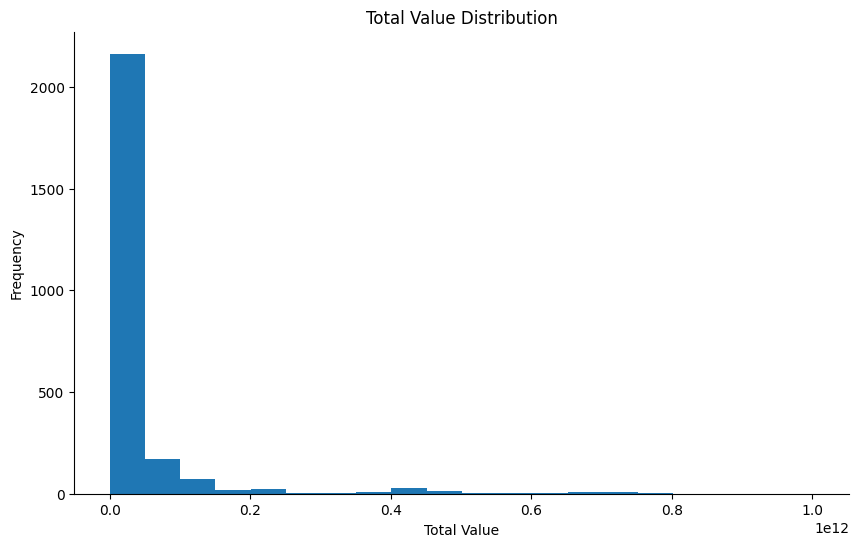

In [ ]:
# Check if the total_value column exists, if not, create it as a sum of 'value' and 'chained_value'
if 'total_value' not in df.columns:
    df['total_value'] = df['value'] + df['chained_value'].fillna(0)

# Plot the histogram
plt.figure(figsize=(10, 6))
df['total_value'].plot(kind='hist', bins=20, title='Total Value Distribution')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

**2.Trend Analysis**

Create line charts to visualize trends over time for value and chained_value across different gov_level, mode, and trust_fund.

In [ ]:
plot_data = df[['year', 'gov_level', 'mode', 'trust_fund', 'value', 'chained_value']]
plot_data['year'] = plot_data['year'].astype(str)

<ipython-input-15-37acbf2fea09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['year'] = plot_data['year'].astype(str)


In [ ]:
sns.set(style="whitegrid")

def plot_trends(data, value_column, title):
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=data, x='year', y=value_column, hue='gov_level', style='mode', markers=True, dashes=False)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(value_column)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

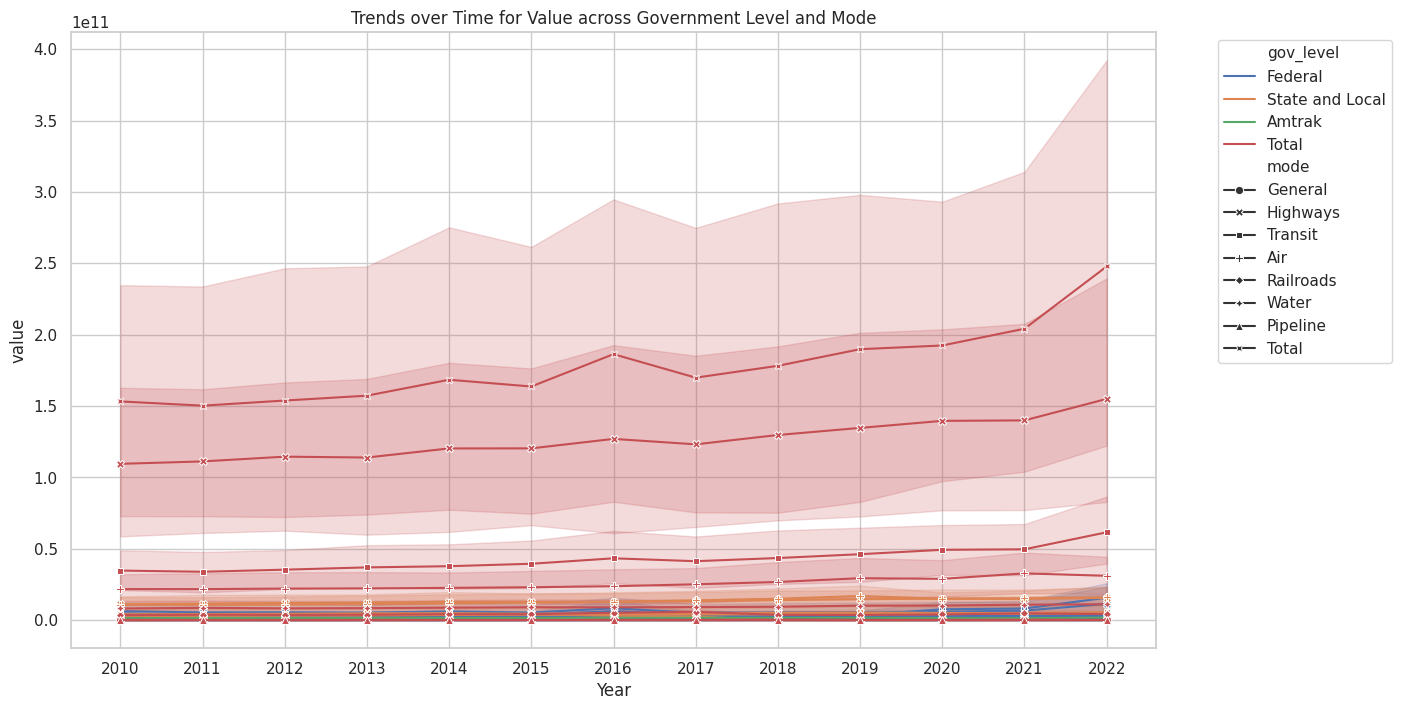

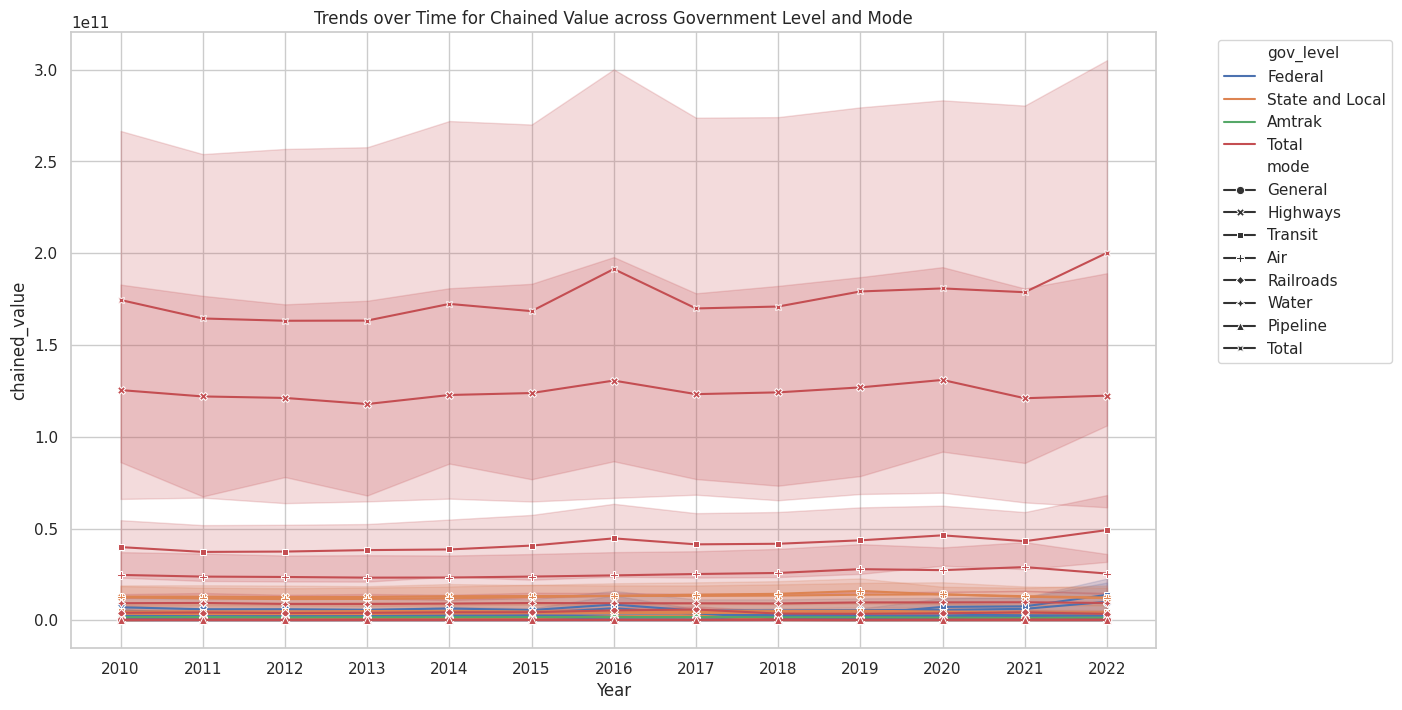

In [ ]:
plot_trends(plot_data, 'value', 'Trends over Time for Value across Government Level and Mode')
plot_trends(plot_data, 'chained_value', 'Trends over Time for Chained Value across Government Level and Mode')


**3.Comparative Analysis:**

Comparison of financial data across different gov_level (e.g., Federal vs. State).
Analysis by mode of transportation.


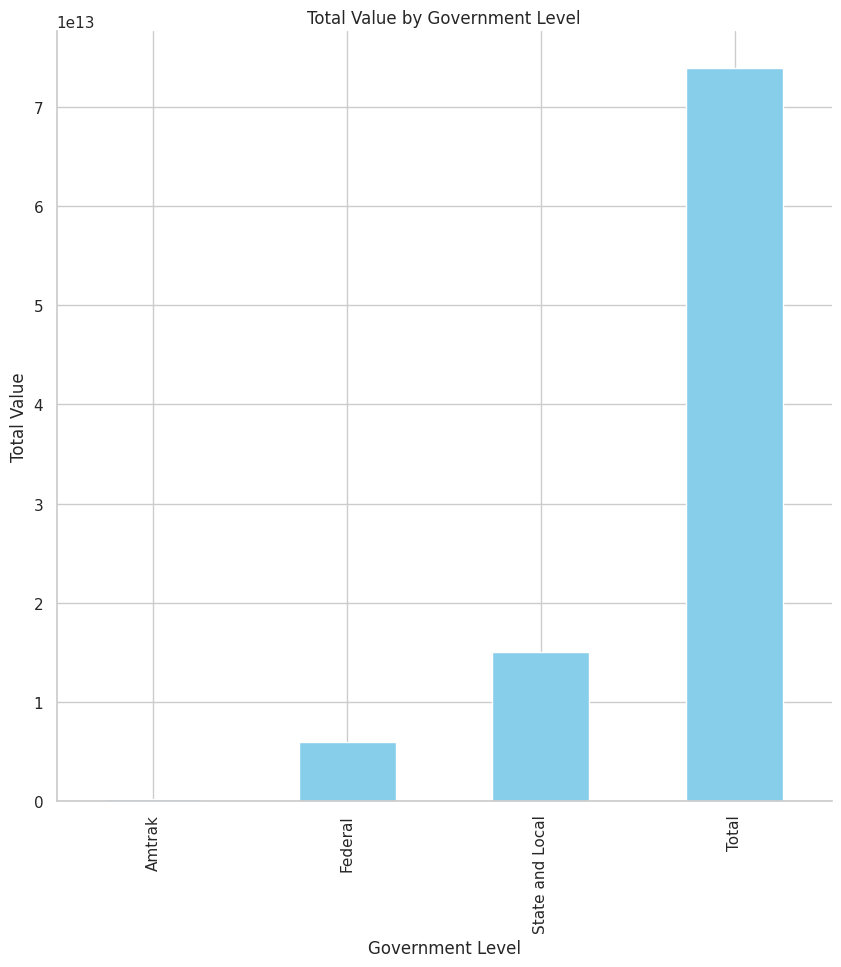

In [ ]:

# Load the CSV file
file_path = 'Transportation_Public_Financial_Statistics__TPFS_.csv'
data = pd.read_csv(file_path)

# Check if the total_value column exists, if not, create it as a sum of 'value' and 'chained_value'
if 'total_value' not in data.columns:
    data['total_value'] = data['value'] + data['chained_value'].fillna(0)

# Group by government level and calculate the sum of total value
gov_level_comparison = data.groupby('gov_level')['total_value'].sum().sort_values()

# Group by mode of transportation and calculate the sum of total value
mode_comparison = data.groupby('mode')['total_value'].sum().sort_values()

# Plotting the comparison by government level
plt.figure(figsize=(22, 10))

# Government Level Comparison
plt.subplot(1, 2, 1)
gov_level_comparison.plot(kind='bar', color='skyblue')
plt.title('Total Value by Government Level')
plt.xlabel('Government Level')
plt.ylabel('Total Value')
plt.gca().spines[['top', 'right']].set_visible(False)




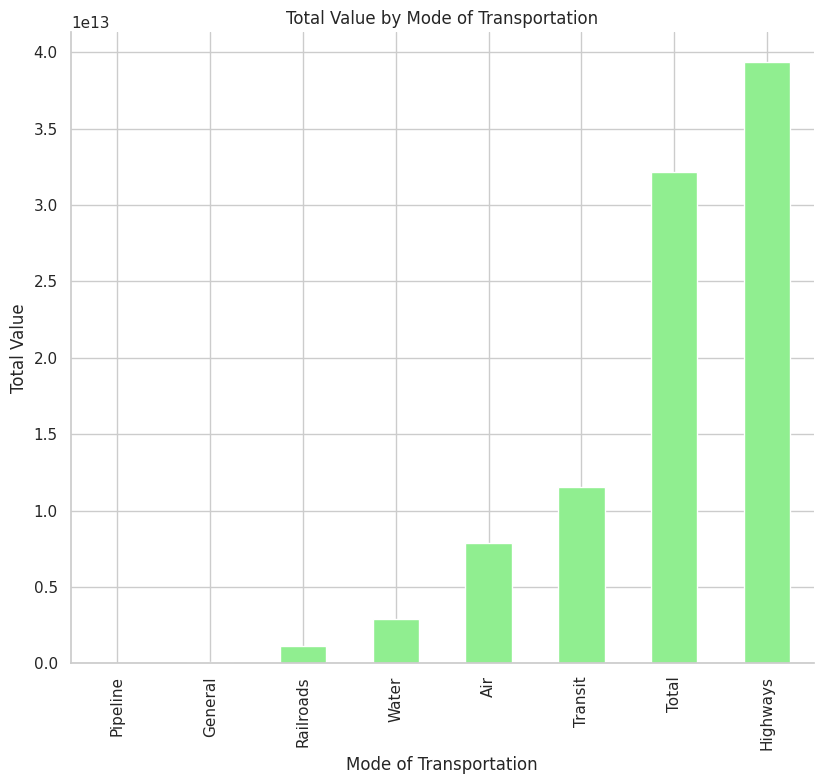

In [ ]:
# Plotting the comparison by government level
plt.figure(figsize=(16, 8))

# Mode of Transportation Comparison
plt.subplot(1, 2, 2)
mode_comparison.plot(kind='bar', color='lightgreen')
plt.title('Total Value by Mode of Transportation')
plt.xlabel('Mode of Transportation')
plt.ylabel('Total Value')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

**4.Inflation Adjustment:**

Impact of inflation (deflator) on financial values over the years.

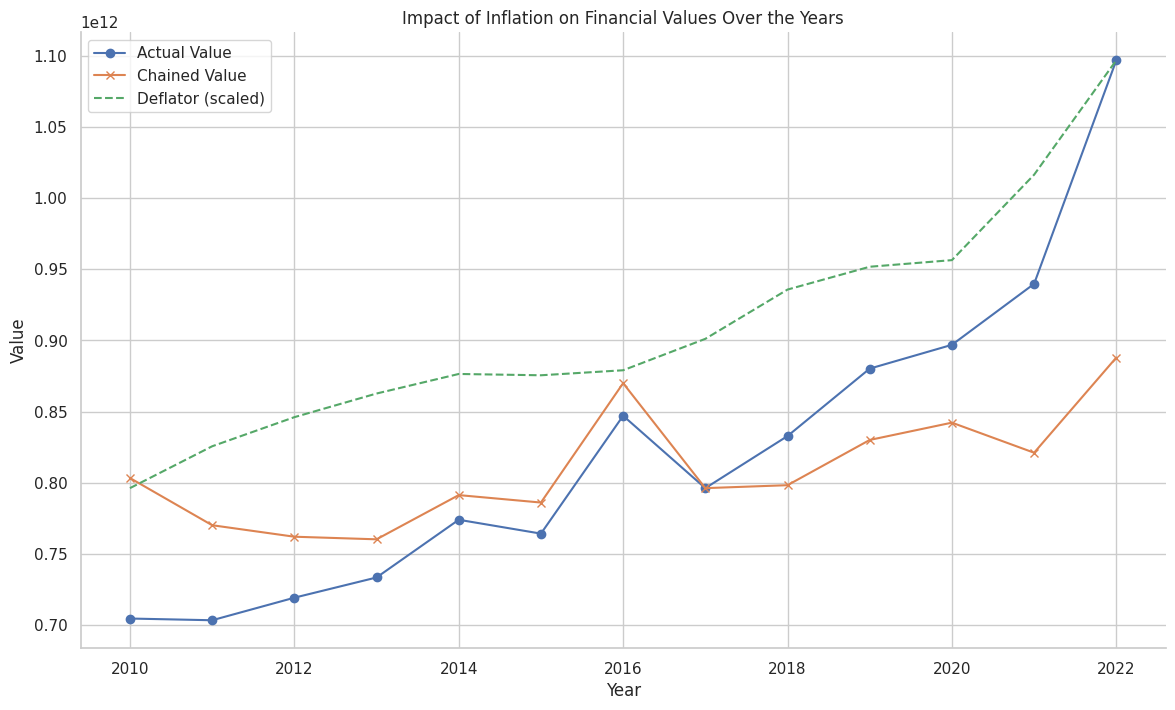

In [ ]:

# Load the CSV file
file_path = 'Transportation_Public_Financial_Statistics__TPFS_.csv'
data = pd.read_csv(file_path)

# Ensure the data has no missing values in relevant columns
data = data.dropna(subset=['value', 'chained_value', 'deflator', 'year'])

# Group by year and calculate the sum of value, chained_value, and mean of deflator
yearly_data = data.groupby('year').agg({
    'value': 'sum',
    'chained_value': 'sum',
    'deflator': 'mean'
}).reset_index()

# Plot the values over the years
plt.figure(figsize=(14, 8))

# Plot the actual value
plt.plot(yearly_data['year'], yearly_data['value'], label='Actual Value', marker='o')
# Plot the chained value
plt.plot(yearly_data['year'], yearly_data['chained_value'], label='Chained Value', marker='x')
# Plot the deflator
plt.plot(yearly_data['year'], yearly_data['deflator'] * max(yearly_data['value']) / max(yearly_data['deflator']), label='Deflator (scaled)', linestyle='--')

# Add titles and labels
plt.title('Impact of Inflation on Financial Values Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


**5.Category-wise Analysis**

Use pivot tables to summarize value by gov_level, mode, year, and trust_fund.
Compare expenditures and revenues across different modes of transportation.

**create pivot table**

In [ ]:
# Create pivot tables
pivot_table = pd.pivot_table(
    df,
    values='value',
    index=['gov_level', 'mode'],
    columns=['year', 'trust_fund'],
    aggfunc='sum',
    fill_value=0,
    margins=True,  # Add totals
    margins_name='Grand Total'  # Unique name for totals to avoid conflicts
)

pivot_table.head(10)  # Display first 10 rows of the pivot table for brevity


year                                2010                               2011  \
trust_fund                Non-Trust Fund Total    Trust Fund Non-Trust Fund   
gov_level       mode                                                          
Amtrak          Railroads   7.306510e+09   0.0  0.000000e+00   7.999080e+09   
Federal         Air         2.332399e+10   0.0  2.097641e+10   2.165718e+10   
                General     7.460000e+08   0.0  0.000000e+00   6.600000e+08   
                Highways    3.095470e+10   0.0  8.281226e+10   2.240406e+10   
                Pipeline    3.040000e+08   0.0  1.800000e+07   3.360000e+08   
                Railroads   5.387900e+09   0.0  0.000000e+00   4.957500e+09   
                Transit     1.144805e+10   0.0  1.697919e+10   9.449575e+09   
                Water       2.127160e+10   0.0  2.274597e+09   2.281420e+10   
State and Local Air         4.328781e+10   0.0  0.000000e+00   4.328781e+10   
                Highways    3.350858e+11   0.0  0.000000e+00   3.502608e+11   

year                                                    2012        \
trust_fund                Total    Trust Fund Non-Trust Fund Total   
gov_level       mode                                                 
Amtrak          Railroads   0.0  0.000000e+00   7.471029e+09   0.0   
Federal         Air         0.0  2.254039e+10   2.139200e+10   0.0   
                General     0.0  0.000000e+00   5.940000e+08   0.0   
                Highways    0.0  7.740844e+10   1.326942e+10   0.0   
                Pipeline    0.0  3.370773e+07   3.100000e+08   0.0   
                Railroads   0.0  0.000000e+00   4.968500e+09   0.0   
                Transit     0.0  1.213434e+10   8.118038e+09   0.0   
                Water       0.0  2.607305e+09   2.100500e+10   0.0   
State and Local Air         0.0  0.000000e+00   4.382930e+10   0.0   
                Highways    0.0  0.000000e+00   3.607371e+11   0.0   

year                                              2013  ...           2020  \
trust_fund                   Trust Fund Non-Trust Fund  ... Non-Trust Fund   
gov_level       mode                                    ...                  
Amtrak          Railroads  0.000000e+00   7.835000e+09  ...   7.622300e+09   
Federal         Air        2.426286e+10   2.079000e+10  ...   1.688700e+10   
                General    0.000000e+00   7.460000e+08  ...   7.740000e+08   
                Highways   8.739347e+10   9.066600e+09  ...   1.551880e+10   
                Pipeline   3.858507e+07   3.320000e+08  ...   5.100000e+08   
                Railroads  0.000000e+00   4.898000e+09  ...   6.714000e+09   
                Transit    1.321588e+10   7.113634e+09  ...   3.088233e+10   
                Water      2.677386e+09   2.120840e+10  ...   2.448500e+10   
State and Local Air        0.000000e+00   4.526404e+10  ...   6.014483e+10   
                Highways   0.000000e+00   3.699845e+11  ...   4.525308e+11   

year                                                    2021        \
trust_fund                Total    Trust Fund Non-Trust Fund Total   
gov_level       mode                                                 
Amtrak          Railroads   0.0  0.000000e+00   7.384900e+09   0.0   
Federal         Air         0.0  2.993813e+10   2.882744e+10   0.0   
                General     0.0  0.000000e+00   9.680000e+08   0.0   
                Highways    0.0  9.160619e+10   2.180980e+10   0.0   
                Pipeline    0.0  3.954687e+07   4.880000e+08   0.0   
                Railroads   0.0  0.000000e+00   1.012900e+10   0.0   
                Transit     0.0  1.518325e+10   3.281929e+10   0.0   
                Water       0.0  3.221663e+09   2.674740e+10   0.0   
State and Local Air         0.0  0.000000e+00   6.140384e+10   0.0   
                Highways    0.0  0.000000e+00   4.499232e+11   0.0   

year                                              2022                      \
trust_fund                   Trust Fund Non-Trust Fund To

**6.Distribution Analysis:**

Distribution of value and chained_value across different trust_fund statuses.

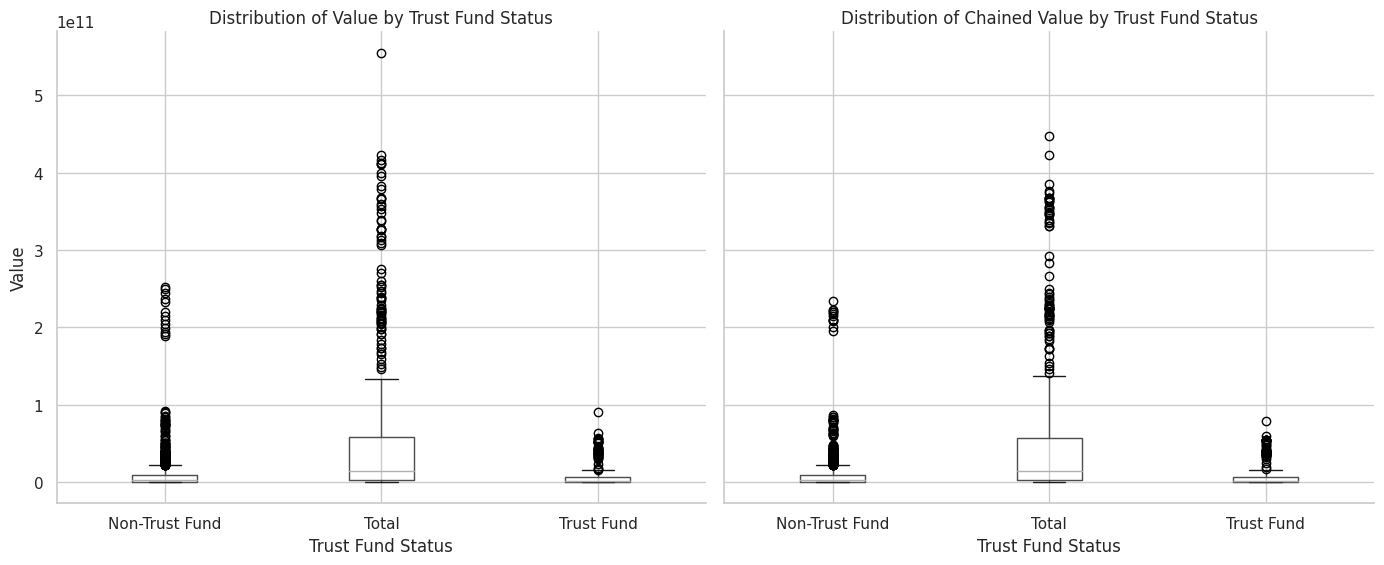

In [ ]:

# Load the CSV file
file_path = 'Transportation_Public_Financial_Statistics__TPFS_.csv'
data = pd.read_csv(file_path)

# Prepare the data by ensuring there are no missing values in relevant columns
data = data.dropna(subset=['value', 'chained_value', 'trust_fund'])

# Create subplots for the box plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Box plot for the 'value' distribution across different trust_fund statuses
data.boxplot(column='value', by='trust_fund', ax=axes[0])
axes[0].set_title('Distribution of Value by Trust Fund Status')
axes[0].set_xlabel('Trust Fund Status')
axes[0].set_ylabel('Value')
axes[0].spines[['top', 'right']].set_visible(False)

# Box plot for the 'chained_value' distribution across different trust_fund statuses
data.boxplot(column='chained_value', by='trust_fund', ax=axes[1])
axes[1].set_title('Distribution of Chained Value by Trust Fund Status')
axes[1].set_xlabel('Trust Fund Status')
axes[1].spines[['top', 'right']].set_visible(False)


# Adjust layout and show the plot
plt.suptitle('')  # Suppress the default title to avoid redundancy
plt.tight_layout()
plt.show()


**7.Correlation Analysis:**

Correlation between different financial metrics (value, chained_value, deflator).

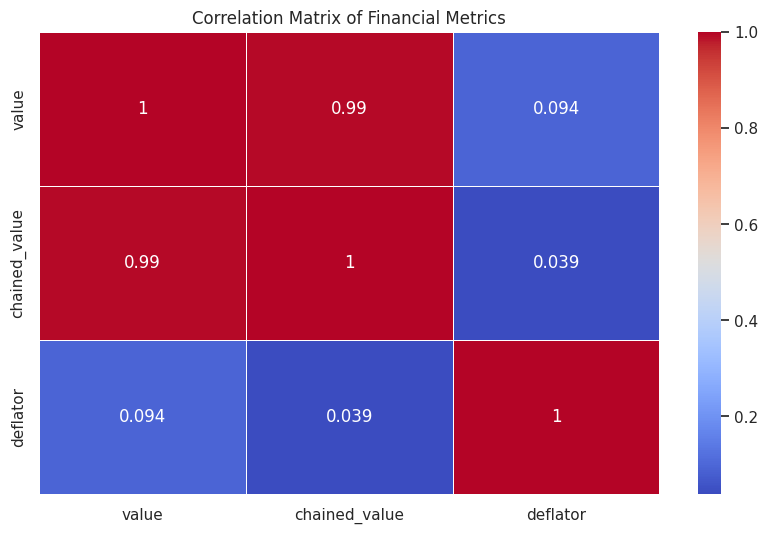

In [ ]:

# Load the CSV file
file_path = 'Transportation_Public_Financial_Statistics__TPFS_.csv'
data = pd.read_csv(file_path)

# Prepare the data by ensuring there are no missing values in the relevant columns
data = data[['value', 'chained_value', 'deflator']].dropna()

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()


**Value and Chained Value: **
The correlation coefficient between value and chained_value is 0.99. This high positive correlation suggests that the actual values and inflation-adjusted values are closely related, as expected. They tend to move in the same direction and have a very strong linear relationship.

**Value and Deflator: **
The correlation coefficient between value and deflator is 0.094. This low positive correlation suggests that the actual financial values and the deflator (used for inflation adjustment) are not strongly correlated. This means that changes in the deflator do not have a strong direct relationship with changes in the actual financial values.

**Chained Value and Deflator: **
The correlation coefficient between chained_value and deflator is 0.039. This very low positive correlation indicates an even weaker relationship between the inflation-adjusted values and the deflator.

**Interpretation:**
High Correlation Between Value and Chained Value: This is expected since chained value is derived from the actual value adjusted for inflation. The near-perfect correlation shows that the inflation adjustment is consistently applied.

**Low Correlation Between Financial Values and Deflator: **
The low correlation between both value and chained_value with the deflator suggests that the financial metrics are not significantly influenced by the deflator. This could imply that other factors are more dominant in determining the financial values.